In [1]:
!pip install sunpy[all] lime

from IPython.display import clear_output
clear_output()

In [2]:
import numpy as np
import pandas as pd

In [3]:
positive = pd.read_csv('positive2017.csv')
positive["CME"] = 1
negative = pd.read_csv('negative2017.csv')
negative["CME"] = 0

In [4]:
data = pd.concat([positive, negative], ignore_index=True)

In [5]:
data

,Unnamed: 0,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,...,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA,Class,Peak Time,CME
0,0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,...,7.077275e+23,50.329,945.314636,4.805,745.287,377,11158,X2.2,2011.02.14_01:56_TAI,1
1,1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,...,4.733711e+23,43.479,961.502686,4.303,63.441,401,11166,M2.0,2011.03.06_14:30_TAI,1
2,2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,...,1.074422e+24,35.873,1934.446167,4.865,615.008,393,11164,M3.7,2011.03.06_20:12_TAI,1
3,3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,...,1.879337e+23,28.525,970.551636,3.971,367.530,637,11226,M2.5,2011.06.06_06:41_TAI,1
4,4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,...,5.269515e+23,43.929,1259.099854,4.777,1080.528,750,11261,M6.0,2011.08.02_13:48_TAI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,344,3.595285e+22,84.079,-0.003574,15462.530,56.773,2778.955,55.143,-0.006698,57.445,...,1.140017e+24,50.285,1467.530029,4.650,198.429,6670,12567,M1.2,2016.07.20_00:46_TAI,0
415,345,4.799015e+22,69.899,-0.003790,9372.617,37.308,2963.899,39.526,-0.008385,46.920,...,9.161178e+23,40.655,1376.174561,4.582,278.922,6670,12567,M5.0,2016.07.22_02:11_TAI,0
416,346,4.290416e+21,107.452,-0.008571,3137.937,9.761,307.977,48.775,-0.020222,31.296,...,2.437881e+22,25.281,69.755775,3.404,50.138,6870,12615,M1.2,2016.11.28_23:38_TAI,0
417,347,1.749252e+22,98.802,0.006088,7534.002,35.434,1197.252,52.201,0.014262,45.836,...,2.709086e+23,38.791,571.571899,4.322,164.838,6972,12644,M2.3,2017.04.01_13:00_TAI,0


## Plotting histograms to see the variability of the data

In [6]:
data = data.drop(['Unnamed: 0','HARPNUM','NOAA','Class','Peak Time'], axis=1)

In [7]:
X = data.drop(columns=['CME'])
y = data['CME']

In [8]:
from sklearn.preprocessing import MinMaxScaler

def normalize_the_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

xn = normalize_the_data(X)

In [9]:
columns = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
       'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH','CME']

df = pd.concat([pd.DataFrame(xn), pd.DataFrame(y)], axis=1)
df.columns = columns

df

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,CME
0,0.110342,0.555340,0.576869,0.605487,0.871939,0.204824,0.796086,0.617300,0.937815,0.565928,0.416585,0.202952,0.116747,0.133011,0.900055,0.128267,0.875866,0.253467,1
1,0.109806,0.389146,0.327431,0.415653,0.699841,0.109642,0.476976,0.359615,0.712539,0.353911,0.440602,0.132131,0.029364,0.088537,0.712075,0.130544,0.784360,0.020611,1
2,0.304362,0.357640,0.427324,0.374485,0.456517,0.294006,0.371139,0.467390,0.470255,0.363660,0.194188,0.311960,0.346695,0.202599,0.503348,0.267394,0.886803,0.208976,1
3,0.117444,0.578940,0.449293,0.119330,0.206602,0.100299,0.341865,0.557608,0.296639,0.489462,0.322072,0.123382,0.194273,0.034370,0.301701,0.131817,0.723843,0.124460,1
4,0.097242,0.581156,0.694119,0.462856,0.698426,0.174382,0.731767,0.835762,0.778385,0.546176,0.621194,0.172255,0.454135,0.098705,0.724424,0.172403,0.870762,0.367955,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,0.179352,0.271938,0.310233,0.602587,0.902343,0.190874,0.454609,0.343955,0.884527,0.249324,0.435066,0.225294,0.028816,0.215047,0.898847,0.201720,0.847612,0.066711,0
415,0.240922,0.102066,0.307962,0.352303,0.589385,0.204026,0.221123,0.334371,0.616947,0.094319,0.376619,0.217920,0.085801,0.172557,0.634577,0.188870,0.835217,0.094200,0
416,0.017401,0.551938,0.257574,0.096069,0.146486,0.015149,0.359403,0.267120,0.219734,0.593036,0.304232,0.014945,0.009559,0.003332,0.212678,0.005115,0.620489,0.016068,0
417,0.084929,0.448314,0.412070,0.276739,0.559255,0.078390,0.410624,0.463042,0.589388,0.409163,0.195494,0.097939,0.072944,0.050116,0.583425,0.075698,0.787824,0.055239,0


In [10]:
pos = df[df['CME'] == 1]
neg = df[df['CME'] == 0]

## ANALYSIS

In [11]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

X = df.drop(columns=['CME'])
y = df['CME']

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(X)
b = np.array(y)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)



[0.61537459 5.63515751 0.78284804 1.2195896  0.00889653 2.54736728
 5.81518271 1.69023503 0.33729209 8.40793228 0.00972535 1.71464508
 4.06762421 1.67611039 0.07075171 0.93414316 0.79031305 3.23425912]


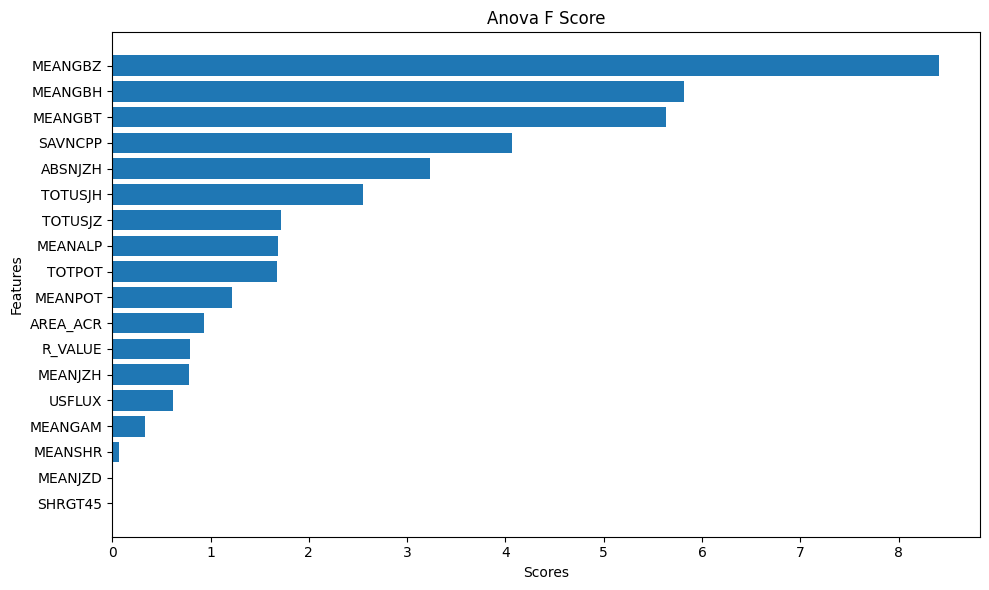

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X.columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()
ordered_features.append("CME")

In [13]:
df_reordered = df.loc[:, ordered_features]

In [14]:
df_reordered

,MEANGBZ,MEANGBH,MEANGBT,SAVNCPP,ABSNJZH,TOTUSJH,TOTUSJZ,MEANALP,TOTPOT,MEANPOT,AREA_ACR,R_VALUE,MEANJZH,USFLUX,MEANGAM,MEANSHR,MEANJZD,SHRGT45,CME
0,0.565928,0.796086,0.555340,0.116747,0.253467,0.204824,0.202952,0.617300,0.133011,0.605487,0.128267,0.875866,0.576869,0.110342,0.937815,0.900055,0.416585,0.871939,1
1,0.353911,0.476976,0.389146,0.029364,0.020611,0.109642,0.132131,0.359615,0.088537,0.415653,0.130544,0.784360,0.327431,0.109806,0.712539,0.712075,0.440602,0.699841,1
2,0.363660,0.371139,0.357640,0.346695,0.208976,0.294006,0.311960,0.467390,0.202599,0.374485,0.267394,0.886803,0.427324,0.304362,0.470255,0.503348,0.194188,0.456517,1
3,0.489462,0.341865,0.578940,0.194273,0.124460,0.100299,0.123382,0.557608,0.034370,0.119330,0.131817,0.723843,0.449293,0.117444,0.296639,0.301701,0.322072,0.206602,1
4,0.546176,0.731767,0.581156,0.454135,0.367955,0.174382,0.172255,0.835762,0.098705,0.462856,0.172403,0.870762,0.694119,0.097242,0.778385,0.724424,0.621194,0.698426,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,0.249324,0.454609,0.271938,0.028816,0.066711,0.190874,0.225294,0.343955,0.215047,0.602587,0.201720,0.847612,0.310233,0.179352,0.884527,0.898847,0.435066,0.902343,0
415,0.094319,0.221123,0.102066,0.085801,0.094200,0.204026,0.217920,0.334371,0.172557,0.352303,0.188870,0.835217,0.307962,0.240922,0.616947,0.634577,0.376619,0.589385,0
416,0.593036,0.359403,0.551938,0.009559,0.016068,0.015149,0.014945,0.267120,0.003332,0.096069,0.005115,0.620489,0.257574,0.017401,0.219734,0.212678,0.304232,0.146486,0
417,0.409163,0.410624,0.448314,0.072944,0.055239,0.078390,0.097939,0.463042,0.050116,0.276739,0.075698,0.787824,0.412070,0.084929,0.589388,0.583425,0.195494,0.559255,0


In [15]:
pos = df_reordered[df_reordered['CME'] == 1]
neg = df_reordered[df_reordered['CME'] == 0]

In [16]:
min_a = pos.index.min()
max_a = pos.index.max()

pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)

min_b = neg.index.min()
max_b = neg.index.max()

neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)

/tmp/ipykernel_22710/2878712047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)
/tmp/ipykernel_22710/2878712047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)


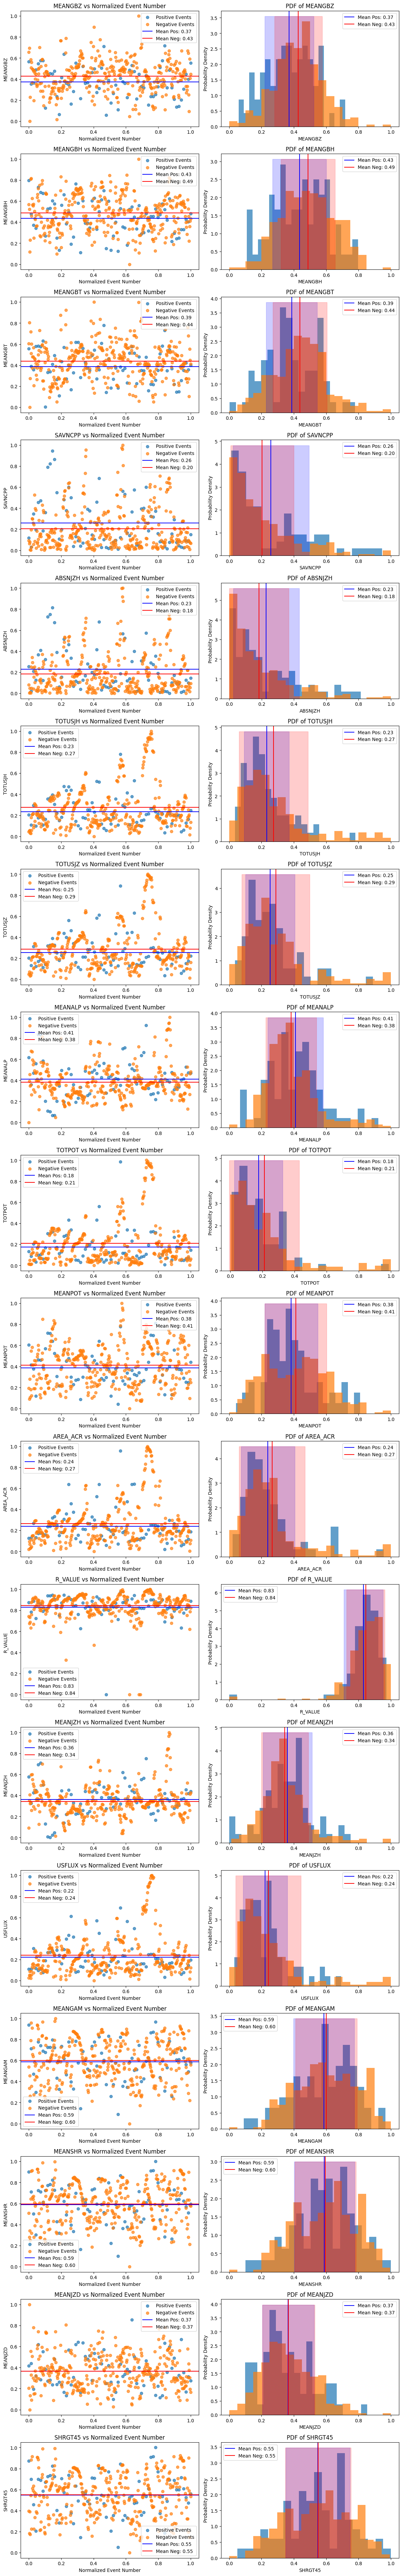

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
plt.figure(figsize=(12, 80))

for i in range(len(columns) - 1):
    mean_pos = np.mean(pos.iloc[:, i])
    mean_neg = np.mean(neg.iloc[:, i])
    std_pos = np.std(pos.iloc[:,i])
    std_neg = np.std(neg.iloc[:,i])

    plt.subplot(len(columns), 2, a)
    plt.scatter(pos["normalized_event_number"], pos.iloc[:, i], alpha=0.7, label="Positive Events")
    plt.scatter(neg["normalized_event_number"], neg.iloc[:, i], alpha=0.7, label="Negative Events")
    plt.axhline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axhline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(ordered_features[i])
    plt.title(f"{ordered_features[i]} vs Normalized Event Number")
    plt.legend()

    plt.subplot(len(columns), 2, a + 1)
    plt.hist(pos.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.hist(neg.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.axvline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axvline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_pos - std_pos, mean_pos + std_pos, color='b', alpha=0.2)
    plt.fill_betweenx([ymin, ymax], mean_neg - std_neg, mean_neg + std_neg, color='r', alpha=0.2)
    plt.xlabel(ordered_features[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {ordered_features[i]}')
    plt.legend()

    a += 2

plt.tight_layout()
plt.savefig("2017_parameters_pdf.jpeg")
plt.show()